In [3]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/Agriculture Data.xlsx - Sheet1.csv')

X = pd.DataFrame(dataset.iloc[:,0:11].values)
Y = pd.DataFrame(dataset.iloc[:,11:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,0:11])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10
0      3   2   2  25  26   9   0   0   0   0   0
1      3   3   1  61  17   9   0   0   0   0   0
2      3   3   1  65  16   9   0   0   0   0   0
3      3   2   1  49  17   9   0   0   0   1   0
4      3   1   1  59  28   9   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2416   1   1   1  50  25   9   0   0   0   0   0
2417   1   2   1  58  49   8   0   0   0   0   0
2418   1   2   1   3  36   9   0   0   0   0   0
2419   3   2   2  48  40   9   0   0   0   0   0
2420   1   1   1  81  37   7   0   0   0   0   0

[2421 rows x 11 columns]
      0
0     0
1     1
2     1
3     0
4     1
...  ..
2416  1
2417  0
2418  1
2419  0
2420  1

[2421 rows x 1 columns]
(1936, 11)
(1936, 1)
Index(['Location of Incident', 'Time', 'Sex', 'Age', 'State', 'Injury Agent ',
       'Confined Space', 'Grain Involved', 'Alcohol/Drugs', 'Seatbelt',
       'Helmet'],
      dtype='object')


In [4]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from deepforest import CascadeForestClassifier 

In [15]:
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
def objective(n_estimators, n_trees,max_layers):
    model = CascadeForestClassifier(n_estimators = int(n_estimators),
                                  n_trees= int(n_trees),
                                  max_layers= (max_layers))

    return cross_val_score(model, X_train, Y_train, cv=10,scoring = 'roc_auc').mean()
param_bounds = {
    'n_estimators': (1, 200),
    'n_trees': (1,500),
    'max_layers': (1,20)
}
optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=5)
best_params = optimizer.max['params']

|   iter    |  target   | max_la... | n_esti... |  n_trees  |
-------------------------------------------------------------
[2024-07-24 20:49:02.351] Start to fit the model:
[2024-07-24 20:49:02.351] Fitting cascade layer = 0 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [5]:
model = CascadeForestClassifier(n_estimators=int(best_params['n_estimators']),n_trees = int(best_params['n_trees']),max_layers= int(best_params['max_layers']))
model.fit(X_train, Y_train)

NameError: name 'best_params' is not defined

In [6]:
model = CascadeForestClassifier(n_estimators=10)
model.fit(X_train,Y_train)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2024-07-25 14:39:48.371] Start to fit the model:
[2024-07-25 14:39:48.372] Fitting cascade layer = 0 
[2024-07-25 14:39:53.185] layer = 0  | Val Acc = 64.566 % | Elapsed = 4.813 s
[2024-07-25 14:39:53.217] Fitting cascade layer = 1 
[2024-07-25 14:40:03.445] layer = 1  | Val Acc = 70.145 % | Elapsed = 10.228 s
[2024-07-25 14:40:03.474] Fitting cascade layer = 2 
[2024-07-25 14:40:12.894] layer = 2  | Val Acc = 69.421 % | Elapsed = 9.421 s
[2024-07-25 14:40:12.894] Early stopping counter: 1 out of 2
[2024-07-25 14:40:12.921] Fitting cascade layer = 3 
[2024-07-25 14:40:22.541] layer = 3  | Val Acc = 69.318 % | Elapsed = 9.620 s
[2024-07-25 14:40:22.541] Early stopping counter: 2 out of 2
[2024-07-25 14:40:22.541] Handling early stopping
[2024-07-25 14:40:22.547] The optimal number of layers: 2


In [7]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[2024-07-25 14:40:22.578] Start to evalute the model:
[2024-07-25 14:40:22.578] Evaluating cascade layer = 0 
[2024-07-25 14:40:22.779] Evaluating cascade layer = 1 
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

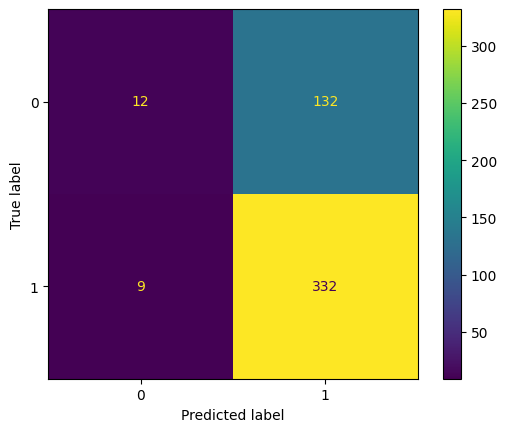

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()

[2024-07-25 14:41:59.926] Start to evalute the model:
[2024-07-25 14:41:59.927] Evaluating cascade layer = 0 
[2024-07-25 14:41:59.981] Evaluating cascade layer = 1 


  0%|          | 0/20 [00:00<?, ?it/s]

[2024-07-25 14:42:00.031] Start to evalute the model:
[2024-07-25 14:42:00.031] Evaluating cascade layer = 0 
[2024-07-25 14:42:00.062] Evaluating cascade layer = 1 
[2024-07-25 14:42:00.102] Start to evalute the model:
[2024-07-25 14:42:00.103] Evaluating cascade layer = 0 
[2024-07-25 14:42:02.262] Evaluating cascade layer = 1 


  5%|▌         | 1/20 [00:04<01:26,  4.57s/it]

[2024-07-25 14:42:04.606] Start to evalute the model:
[2024-07-25 14:42:04.607] Evaluating cascade layer = 0 
[2024-07-25 14:42:04.640] Evaluating cascade layer = 1 
[2024-07-25 14:42:04.682] Start to evalute the model:
[2024-07-25 14:42:04.683] Evaluating cascade layer = 0 
[2024-07-25 14:42:07.070] Evaluating cascade layer = 1 


 10%|█         | 2/20 [00:09<01:24,  4.72s/it]

[2024-07-25 14:42:09.427] Start to evalute the model:
[2024-07-25 14:42:09.427] Evaluating cascade layer = 0 
[2024-07-25 14:42:09.461] Evaluating cascade layer = 1 
[2024-07-25 14:42:09.505] Start to evalute the model:
[2024-07-25 14:42:09.506] Evaluating cascade layer = 0 
[2024-07-25 14:42:11.793] Evaluating cascade layer = 1 


 15%|█▌        | 3/20 [00:14<01:19,  4.69s/it]

[2024-07-25 14:42:14.083] Start to evalute the model:
[2024-07-25 14:42:14.083] Evaluating cascade layer = 0 
[2024-07-25 14:42:14.118] Evaluating cascade layer = 1 
[2024-07-25 14:42:14.160] Start to evalute the model:
[2024-07-25 14:42:14.162] Evaluating cascade layer = 0 
[2024-07-25 14:42:16.325] Evaluating cascade layer = 1 


 20%|██        | 4/20 [00:18<01:15,  4.70s/it]

[2024-07-25 14:42:18.785] Start to evalute the model:
[2024-07-25 14:42:18.786] Evaluating cascade layer = 0 
[2024-07-25 14:42:18.817] Evaluating cascade layer = 1 
[2024-07-25 14:42:18.861] Start to evalute the model:
[2024-07-25 14:42:18.863] Evaluating cascade layer = 0 
[2024-07-25 14:42:20.860] Evaluating cascade layer = 1 


 25%|██▌       | 5/20 [00:23<01:09,  4.65s/it]

[2024-07-25 14:42:23.345] Start to evalute the model:
[2024-07-25 14:42:23.345] Evaluating cascade layer = 0 
[2024-07-25 14:42:23.387] Evaluating cascade layer = 1 
[2024-07-25 14:42:23.439] Start to evalute the model:
[2024-07-25 14:42:23.441] Evaluating cascade layer = 0 
[2024-07-25 14:42:25.967] Evaluating cascade layer = 1 


 30%|███       | 6/20 [00:28<01:08,  4.90s/it]

[2024-07-25 14:42:28.728] Start to evalute the model:
[2024-07-25 14:42:28.728] Evaluating cascade layer = 0 
[2024-07-25 14:42:28.772] Evaluating cascade layer = 1 
[2024-07-25 14:42:28.822] Start to evalute the model:
[2024-07-25 14:42:28.824] Evaluating cascade layer = 0 
[2024-07-25 14:42:31.626] Evaluating cascade layer = 1 


 35%|███▌      | 7/20 [00:33<01:04,  4.95s/it]

[2024-07-25 14:42:33.783] Start to evalute the model:
[2024-07-25 14:42:33.783] Evaluating cascade layer = 0 
[2024-07-25 14:42:33.819] Evaluating cascade layer = 1 
[2024-07-25 14:42:33.867] Start to evalute the model:
[2024-07-25 14:42:33.869] Evaluating cascade layer = 0 
[2024-07-25 14:42:36.389] Evaluating cascade layer = 1 


 40%|████      | 8/20 [00:38<01:00,  5.00s/it]

[2024-07-25 14:42:38.893] Start to evalute the model:
[2024-07-25 14:42:38.893] Evaluating cascade layer = 0 
[2024-07-25 14:42:38.938] Evaluating cascade layer = 1 
[2024-07-25 14:42:38.988] Start to evalute the model:
[2024-07-25 14:42:38.990] Evaluating cascade layer = 0 
[2024-07-25 14:42:41.267] Evaluating cascade layer = 1 


 45%|████▌     | 9/20 [00:43<00:54,  4.93s/it]

[2024-07-25 14:42:43.657] Start to evalute the model:
[2024-07-25 14:42:43.657] Evaluating cascade layer = 0 
[2024-07-25 14:42:43.695] Evaluating cascade layer = 1 
[2024-07-25 14:42:43.738] Start to evalute the model:
[2024-07-25 14:42:43.740] Evaluating cascade layer = 0 
[2024-07-25 14:42:46.369] Evaluating cascade layer = 1 


 50%|█████     | 10/20 [00:48<00:50,  5.06s/it]

[2024-07-25 14:42:49.013] Start to evalute the model:
[2024-07-25 14:42:49.014] Evaluating cascade layer = 0 
[2024-07-25 14:42:49.046] Evaluating cascade layer = 1 
[2024-07-25 14:42:49.095] Start to evalute the model:
[2024-07-25 14:42:49.097] Evaluating cascade layer = 0 
[2024-07-25 14:42:51.626] Evaluating cascade layer = 1 


 55%|█████▌    | 11/20 [00:54<00:46,  5.18s/it]

[2024-07-25 14:42:54.472] Start to evalute the model:
[2024-07-25 14:42:54.472] Evaluating cascade layer = 0 
[2024-07-25 14:42:54.511] Evaluating cascade layer = 1 
[2024-07-25 14:42:54.554] Start to evalute the model:
[2024-07-25 14:42:54.556] Evaluating cascade layer = 0 
[2024-07-25 14:42:57.287] Evaluating cascade layer = 1 


 60%|██████    | 12/20 [00:59<00:41,  5.23s/it]

[2024-07-25 14:42:59.823] Start to evalute the model:
[2024-07-25 14:42:59.823] Evaluating cascade layer = 0 
[2024-07-25 14:42:59.865] Evaluating cascade layer = 1 
[2024-07-25 14:42:59.914] Start to evalute the model:
[2024-07-25 14:42:59.916] Evaluating cascade layer = 0 
[2024-07-25 14:43:02.363] Evaluating cascade layer = 1 


 65%|██████▌   | 13/20 [01:04<00:35,  5.13s/it]

[2024-07-25 14:43:04.718] Start to evalute the model:
[2024-07-25 14:43:04.718] Evaluating cascade layer = 0 
[2024-07-25 14:43:04.753] Evaluating cascade layer = 1 
[2024-07-25 14:43:04.790] Start to evalute the model:
[2024-07-25 14:43:04.791] Evaluating cascade layer = 0 
[2024-07-25 14:43:07.166] Evaluating cascade layer = 1 


 70%|███████   | 14/20 [01:09<00:30,  5.06s/it]

[2024-07-25 14:43:09.631] Start to evalute the model:
[2024-07-25 14:43:09.631] Evaluating cascade layer = 0 
[2024-07-25 14:43:09.667] Evaluating cascade layer = 1 
[2024-07-25 14:43:09.712] Start to evalute the model:
[2024-07-25 14:43:09.713] Evaluating cascade layer = 0 
[2024-07-25 14:43:12.104] Evaluating cascade layer = 1 


 75%|███████▌  | 15/20 [01:14<00:24,  5.00s/it]

[2024-07-25 14:43:14.474] Start to evalute the model:
[2024-07-25 14:43:14.474] Evaluating cascade layer = 0 
[2024-07-25 14:43:14.501] Evaluating cascade layer = 1 
[2024-07-25 14:43:14.534] Start to evalute the model:
[2024-07-25 14:43:14.535] Evaluating cascade layer = 0 
[2024-07-25 14:43:16.234] Evaluating cascade layer = 1 


 80%|████████  | 16/20 [01:18<00:18,  4.73s/it]

[2024-07-25 14:43:18.577] Start to evalute the model:
[2024-07-25 14:43:18.577] Evaluating cascade layer = 0 
[2024-07-25 14:43:18.617] Evaluating cascade layer = 1 
[2024-07-25 14:43:18.659] Start to evalute the model:
[2024-07-25 14:43:18.661] Evaluating cascade layer = 0 
[2024-07-25 14:43:21.172] Evaluating cascade layer = 1 


 85%|████████▌ | 17/20 [01:23<00:14,  4.89s/it]

[2024-07-25 14:43:23.850] Start to evalute the model:
[2024-07-25 14:43:23.850] Evaluating cascade layer = 0 
[2024-07-25 14:43:23.885] Evaluating cascade layer = 1 
[2024-07-25 14:43:23.931] Start to evalute the model:
[2024-07-25 14:43:23.933] Evaluating cascade layer = 0 
[2024-07-25 14:43:26.420] Evaluating cascade layer = 1 


 90%|█████████ | 18/20 [01:29<00:09,  5.00s/it]

[2024-07-25 14:43:29.098] Start to evalute the model:
[2024-07-25 14:43:29.099] Evaluating cascade layer = 0 
[2024-07-25 14:43:29.141] Evaluating cascade layer = 1 
[2024-07-25 14:43:29.191] Start to evalute the model:
[2024-07-25 14:43:29.193] Evaluating cascade layer = 0 
[2024-07-25 14:43:31.785] Evaluating cascade layer = 1 


 95%|█████████▌| 19/20 [01:34<00:05,  5.04s/it]

[2024-07-25 14:43:34.236] Start to evalute the model:
[2024-07-25 14:43:34.236] Evaluating cascade layer = 0 
[2024-07-25 14:43:34.275] Evaluating cascade layer = 1 
[2024-07-25 14:43:34.325] Start to evalute the model:
[2024-07-25 14:43:34.328] Evaluating cascade layer = 0 
[2024-07-25 14:43:36.564] Evaluating cascade layer = 1 


100%|██████████| 20/20 [01:38<00:00,  4.95s/it]


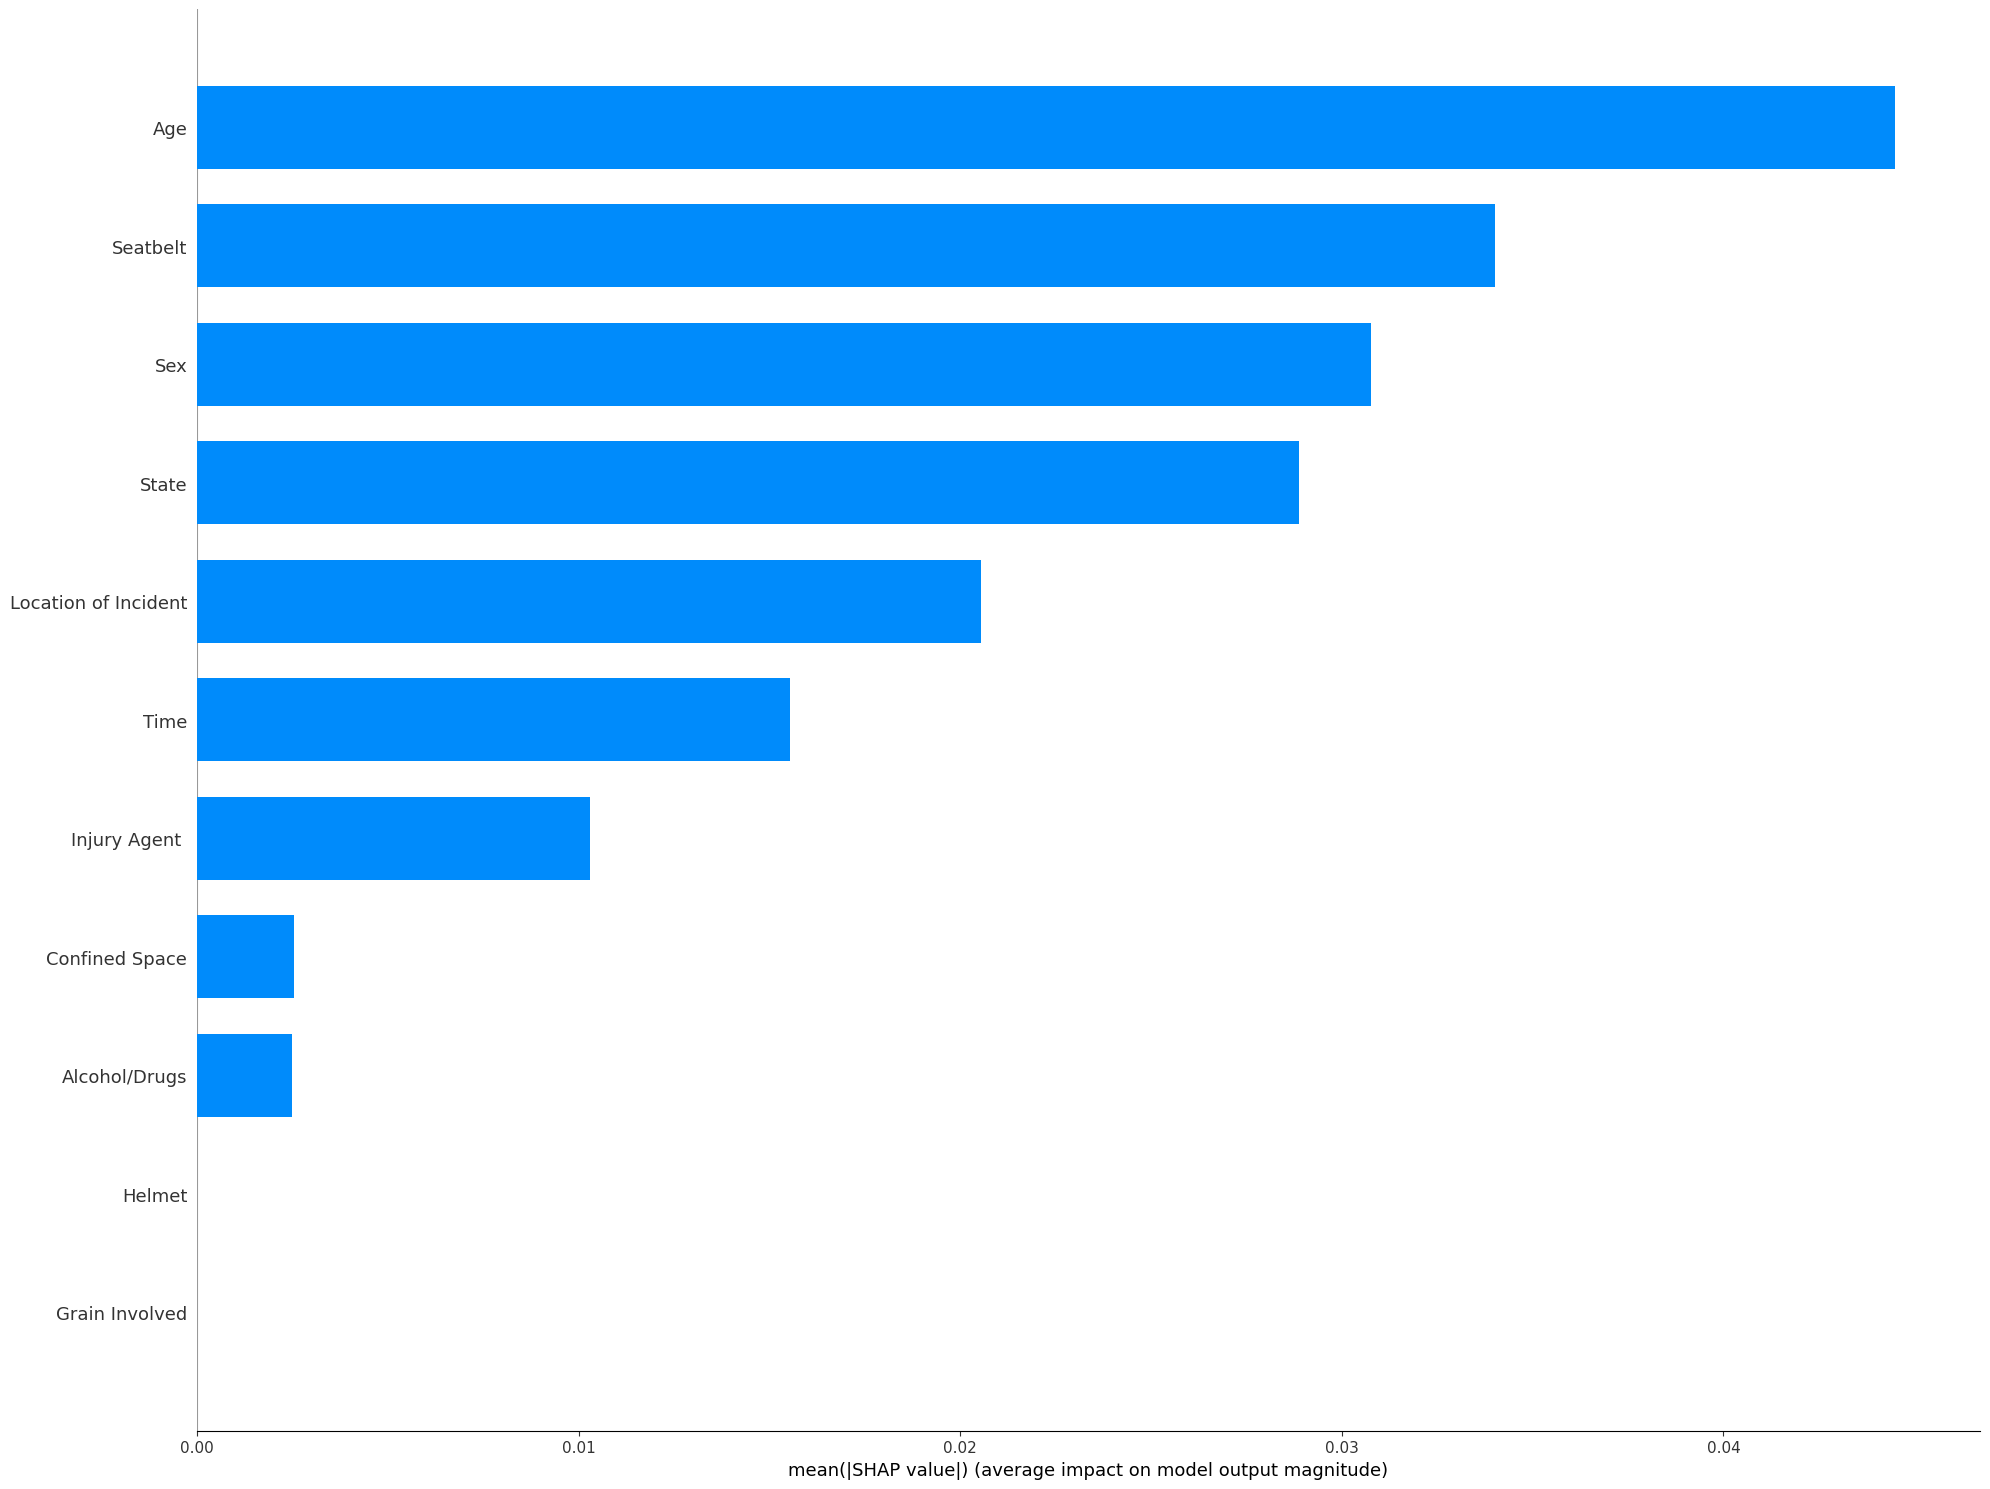

In [11]:
import shap
X_test_shap = shap.sample(X_train,nsamples = 20)
explainer = shap.KernelExplainer(model.predict, X_test_shap)
shap_values = explainer.shap_values(X_test_shap)
shap.summary_plot(shap_values, X_test_shap,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

